In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import scipy
from matplotlib import pyplot as plt
%matplotlib inline 
data_result=pd.read_csv('../data/AdSmartABdata.csv')
data_result.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


# Exploration

Check for missing values first 

In [4]:
#let first check for null values 

def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The adSmartdata dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data_result)

The adSmartdata dataset contains 0.0 % missing values.


Now that we do not have missing values then let us go on with the exploration

Count unique values of categorical variables

15

In [5]:
#list the browsers the users are using 
data_result['browser'].unique()

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [6]:
#count unique browsers 
print("The users are using ", len(data_result['browser'].unique()),  "unique browsers.")


The users are using  15 unique browsers.


In [17]:
#list the type of phones the users are using 
data['device_make'].unique()

array(['Generic Smartphone', 'E5823', 'Samsung SM-A705FN',
       'Samsung SM-G960F', 'Samsung SM-G973F', 'iPhone',
       'Samsung SM-G935F', 'HTC One', 'LG-$2', 'Samsung SM-A202F',
       'XT1032', 'COL-L29', 'Samsung SM-N960U1', 'Samsung SM-A715F',
       'Samsung SM-G930F', 'I3312', 'Samsung SM-G950F', 'FIG-LX1',
       'Samsung SM-G920F', 'MRD-LX1', 'Samsung SM-N950F', 'Moto $2',
       'Samsung SM-G970F', 'Samsung GT-I9505', 'Samsung SM-G981B',
       'Pixel 3a', 'Samsung SM-J600FN', 'Samsung SM-A105FN',
       'OnePlus ONEPLUS A3003', 'POT-LX1', 'Samsung SM-G975F',
       'Samsung SM-J330FN', 'Samsung SM-G770F', 'H3311', 'MAR-LX1A',
       'HTC One $2', 'Samsung SM-G965F', 'ELE-L09', 'Samsung SM-J415FN',
       'Samsung SM-G900F', 'Lenovo A1010a20', 'CLT-L09', 'HTC Desire $2',
       'Samsung SM-G980F', 'Samsung SM-G955F', 'Samsung SM-N960F',
       'Nexus 5', 'Samsung SM-J260F', 'HTC U11', 'Samsung SM-A405FN',
       'Samsung SM-A600FN', 'ANE-LX1', 'VOG-L09', 'Samsung SM-G986B'

In [7]:
#count unique devices 
print("The users are using ", len(data_result['device_make'].unique()),  "unique devices .")

The users are using  270 unique devices .


# More exploration to understand the data 

In [20]:
#Let us look at the columns in the dataset
data.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [12]:
#let us group the answers by the experiment 

tim =  data_result.groupby(['experiment','yes']).value_count()
tim.head()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_count'

<AxesSubplot:xlabel='browser', ylabel='count'>

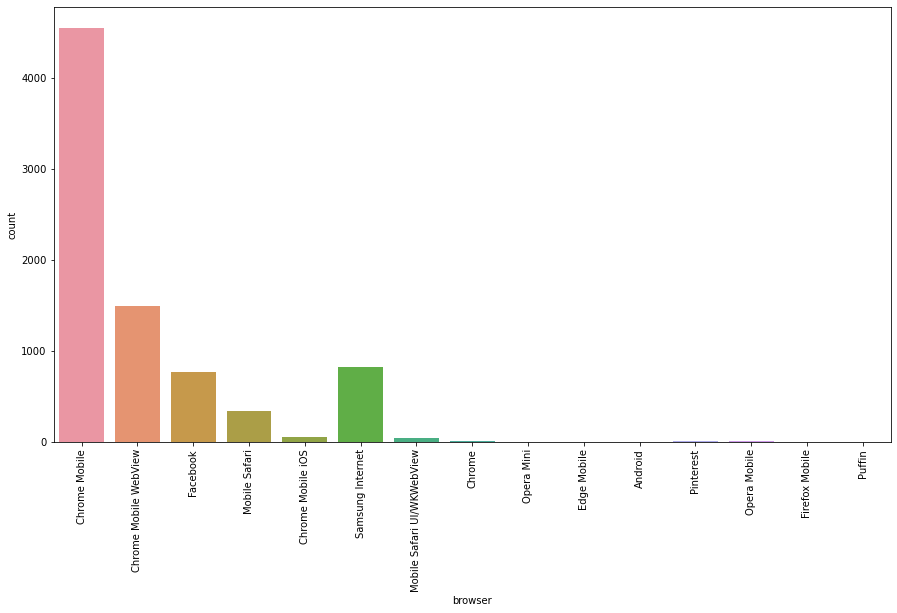

In [9]:
#plot browsers
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x='browser',data=data_result)


As it can be seen in the graph above chrome Mobile wa the mostly used to access the ad followed by chrom mobile webview and then facebook

<AxesSubplot:xlabel='experiment', ylabel='count'>

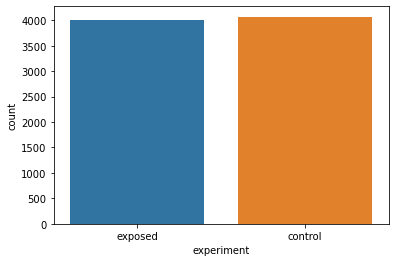

In [10]:
#Compare amount of response from differnt groups
sns.countplot(x='experiment',data=data_result)

As it can be seen above equal number of users made responses in both exposed and control group

<AxesSubplot:xlabel='experiment', ylabel='yes'>

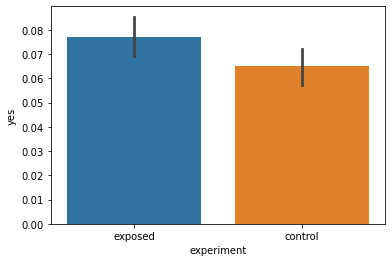

In [11]:
#combine date and hour and covert them to datetime 
sns.barplot(x='experiment',y='yes',data=data_result)

<AxesSubplot:xlabel='experiment', ylabel='no'>

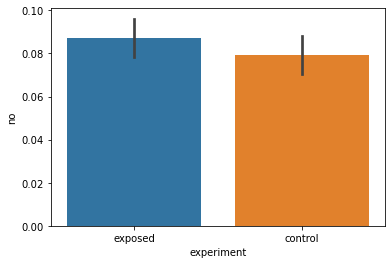

In [58]:
#combine date and hour and covert them to datetime 
sns.barplot(x='experiment',y='no',data=data_result)

In [54]:
#combine date and hour and covert them to datetime 
sns.barplot(x='experiment',y='date',data=data_result)

0        8
1       10
2        2
3       15
4       15
        ..
8072     7
8073    15
8074     9
8075    15
8076    14
Name: hour, Length: 8077, dtype: int64

# Perform hypothesis testing: apply the classical p-value based algorithm

In [73]:
#Setting the null hypothesis
#Ho: The null hypothesis (Ho)states that there is no difference between the control and exposed group in 
#other words the advertising campaign will not result in a significant lift in brand awareness

#Setting the alternative hypothesis 
#H1: The alternative hypothesis states that there will be a significant lift in brand awareness as 
#a result of the advertising caompaign


# Click Through rate (CTR) = # of yes/total events 
#let CTR for control be = pc and CTR for exposed be equal to pe 
#therefore our hypothesis will be Ho : pc=pe and H1 or alternative hypothesis h1: pc!=pe 


#let alpha our level of significance = 0.05, the probability of rejecting the null hypothesis Ho 
#The confidence level (the probability of not rejecting the null hypothesis ) be 1-alpha which is 0.95
alpha =0.05 

#let beta be the probability of failing to reject the null hypothesis when Ho is false 

# 1-beta the probability of rejecting the null hypothesis Ho when Ho is false also called the power of a test (.80)

alpha


0.05

In [24]:
g= data_result.groupby('experiment')['yes'].value_counts()

In [25]:
g['control']

experiment  yes
control     0      3807
            1       264
exposed     0      3698
            1       308
Name: yes, dtype: int64

In [31]:
g['control']

yes
0    3807
1     264
Name: yes, dtype: int64

In [26]:
data_result.groupby('experiment')['no'].value_counts()

experiment  no
control     0     3749
            1      322
exposed     0     3657
            1      349
Name: no, dtype: int64

In [37]:
yes_clicks=data_result.groupby('experiment')['yes'].sum()

In [38]:
yes_clicks

experiment
control    264
exposed    308
Name: yes, dtype: int64

In [35]:
No_clicks=data_result.groupby('experiment')['no'].sum()

In [36]:
No_clicks

experiment
control    322
exposed    349
Name: no, dtype: int64

In [41]:
#Let n1 be the total that were sample or total impressions for control users 
n_control = (No_clicks['control'].sum() + yes_clicks['control'].sum())
n_exposed = (No_clicks['exposed'].sum() + yes_clicks['exposed'].sum())
print(f'Control has a total impression of  {n_control} and Exposed group has a total impression of {n_exposed} ')

Control has a total impression of  586 and Exposed group has a total impression of 657 


In [42]:
# Click Through rate (CTR) = # of yes/total events 
#let CTR for control be = pc and CTR for exposed be equal to pe

pc =yes_clicks['control'].sum() / n_control
pe =yes_clicks['exposed'].sum() / n_control
print(f'The CTR for the control group is   {pc} and The CTR for the exposed group is {pe} ')





The CTR for the control group is   0.45051194539249145 and The CTR for the exposed group is 0.5255972696245734 


In [70]:
def ind_t_test(No_clicks,yes_clicks, alpha=0.05,output_bool =False, state_conclusion = False, express= False):
    #calculate the difference d
    n_control = (No_clicks['control'].sum() + yes_clicks['control'].sum())
    pc =yes_clicks['control'].sum() / n_control
    n_exposed = (No_clicks['exposed'].sum() + yes_clicks['exposed'].sum())
    pe =yes_clicks['exposed'].sum() / n_control
    d=pe-pc
    #calculate the standard error for the proportions 
    p_overall = (yes_clicks['exposed'].sum()+yes_clicks['control'].sum())/(n_control+n_exposed)
    #calculate Term1 
    se_control = (p_overall * (1-p_overall))/n_control
    #calculate Term 2
    se_exposed = (p_overall * (1-p_overall))/n_exposed
    
    #square the terms 
    standardError = np.sqrt(float(se_control)+float(se_exposed))
    print('SE :',standardError)
    
    #T static calculation 
    tStatistic = (d-0)/standardError
    #degree of freedom 
    dof = (n_control+n_exposed-2.0)
    
    #crtitical T value Test Statistic 
    criticalValue = scipy.stats.t.ppf(1.0-alpha, df= dof)
    #Confidence interval 
    confInt = [d- (criticalValue*standardError),d+(criticalValue*standardError)]
    
    #calculate the p-value
    
    p_val = (1- scipy.stats.t.cdf(abs(tStatistic), df \
                                 = ( n_control+n_exposed-2)))* 2.0
    print('\n The p_val is', p_val)
    if p_val < alpha:
        print('\n we reject the null hypothesis Ho')
        print ('\n Therefore we can say that there is a statistical '+\
           'difference between the dummy ad and the improved ad ')
    else:
        print('\n we fail to reject the null hypothesis Ho')
        print ('\n Therefore we can say that there is no  statistical '+\
               'difference between the dummy ad and the improved ad ')
    return p_val

p_val = ind_t_test(No_clicks=No_clicks,yes_clicks=yes_clicks,alpha=alpha,output_bool =True,state_conclusion = False)
    

    

SE : 0.028319932727228023

 The p_val is 0.008119779591985177

 we reject the null hypothesis Ho

 Therefore we can say that there is a statistical difference between the dummy ad and the improved ad 


# Using sequentail testing 

In [72]:
#@title
#REFERENCE
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
# William Q. Meeker, Jr
# Journal of the Royal Statistical Society. Series C (Applied Statistics)
# Vol. 30, No. 2 (1981), pp. 109-115
def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return factorial(n) // factorial(k) // factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)

In [ ]:
class SequentialTest:
  def __init__(self,exposed,control):
    #initialize varibles
    self.exposed =exposed 
    self.control = control
    

  
  def stoppingRule(self, ...):
    '''
    This function should take current observation and return statistical decision made. 
    Consider truncate rule for longer tests
    '''
    S, a, b,

  def computeBoundaries(self,):
    '''
    This function shoud compute boundaries 
    '''

  def plotTest(self,):
    '''
    showing the cumulative statistical test (e.g., log probability ratio) and the uper and lower limits.
    '''

  def plotBoundaries(self,):
    '''cumulative sums of exposed successes, bounded by the critical limits.
    '''